# 0303

Related links

- [Course website](https://www-math.nsysu.edu.tw/~chlin/2025SMath599/2025SMath599.html)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

Read Chapter 1 when you read this book second time.

In [1]:
import numpy as np

In [2]:
### load nsysu

import os
import urllib
import numpy as np

base = r"https://github.com/SageLabTW/auto-grading/raw/master/nsysu-digits/"
for c in ['X', 'y']:
    filename = "nsysu-digits-%s.csv"%c
    if filename not in os.listdir('.'):
        print(filename, 'not found --- will download')
        urllib.request.urlretrieve(base + c + ".csv", filename)

Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')

In [3]:
# load MNIST (long)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

## [Fancy Indexing](https://jakevdp.github.io/PythonDataScienceHandbook/02.07-fancy-indexing.html)

1D fancy indexing

In [4]:
arr = np.random.randint(1,6,10)
print(arr)

[1 1 5 5 4 1 1 1 2 3]


In [5]:
arr[[2,4,3]]

array([5, 4, 5], dtype=int32)

2D fancy indexing

In [6]:
arr = np.random.randint(1,6,12).reshape(3,4)
print(arr)

[[5 1 5 2]
 [1 2 4 5]
 [2 1 2 5]]


In [7]:
# (0,2), (1,1), (2,0)
arr[[0,1,2], [2,1,0]]

array([5, 2, 2], dtype=int32)

Treat , as a operator
```
[0,1,2] + [2,1,0] --> [0+2, 1+1, 2+0]
[0,1,2] , [2,1,0] --> [(0,2), (1,1), (2,0)]
```

combination with selection, slicing, mask

In [8]:
print(arr[0,[2,1,0]])
print(arr[0:2,[2,1,0]])
print(arr[[False, True, False], [2,1,0]])

[5 1 5]
[[5 1 5]
 [4 2 1]]
[4 2 1]


take diagonal entries

In [9]:
A = np.array([
    [2,1,0],
    [1,3,1],
    [0,1,4]
])
A

array([[2, 1, 0],
       [1, 3, 1],
       [0, 1, 4]])

In [10]:
# np.diag(A) = 100 --> not work
A[np.arange(3), np.arange(3)] = 100
A

array([[100,   1,   0],
       [  1, 100,   1],
       [  0,   1, 100]])

Q:  
Let $A$ be a matrix with row sums $d_1, \ldots, d_n$.  
The corresponding Laplacian matrix has diagonal entries $d_1, \ldots, d_n$ and off-diagonal entries same as $-A$.  
For example,  

$$
    A = \begin{bmatrix}
    0 & 1 & 0 \\
    1 & 0 & 1 \\
    0 & 1 & 0
    \end{bmatrix}
    \text{ and }
    L = \begin{bmatrix}
    1 & -1 & 0 \\
    -1 & 2 & -1 \\
    0 & -1 & 1
    \end{bmatrix}.
$$

In [11]:
A = np.array([
    [0,1,0],
    [1,0,1],
    [0,1,0]
])
L = (-A).copy()
L[np.arange(3), np.arange(3)] = A.sum(axis=1)
L

array([[ 1, -1,  0],
       [-1,  2, -1],
       [ 0, -1,  1]])

In [12]:
L = np.diag(A.sum(axis=1)) - A
L

array([[ 1, -1,  0],
       [-1,  2, -1],
       [ 0, -1,  1]])

Q: One-hot encoding.  
Transform the categorial data to one-hot encoding.  

$$
    [0,2,1,2,0] \rightarrow
    \begin{bmatrix}
    1 & 0 & 0 \\
    0 & 0 & 1 \\
    0 & 1 & 0 \\
    0 & 0 & 1 \\
    1 & 0 & 0 \\
    \end{bmatrix}
$$

In [13]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [14]:
y = np.array([0,2,1,2,0])
np.eye(3)[y]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

## [Sorting Arrays](https://jakevdp.github.io/PythonDataScienceHandbook/02.08-sorting.html)

sorting, or finding the maximum or minimum, will be used in many places:  

- classification: $k$-nearest neighborhood classification, decision tree, 
- clustering: $k$-means, DBSCAN  
- manifold learning: IsoMap, spectral clustering  

selection sort and bogosort

mergesort, quicksort

sort and argsort

In [15]:
arr = np.random.randint(1,10,6)
arr

array([5, 8, 1, 8, 5, 3], dtype=int32)

In [16]:
arr.argmax() # index 是 argmax 時達到最大值

np.int64(1)

In [17]:
new_arr = arr.copy()
ind = new_arr.argsort()
# 4 4 5 7 8 9: sort
# 0 4 2 1 5 3: argsort gives you indces
print(arr)
print(ind)

[5 8 1 8 5 3]
[2 5 4 0 3 1]


sort along an axis

In [18]:
arr = np.random.randint(1, 10,(3,4))
arr

array([[4, 4, 3, 3],
       [3, 2, 1, 7],
       [7, 8, 4, 8]], dtype=int32)

In [19]:
arr.sort(axis=0)
arr

array([[3, 2, 1, 3],
       [4, 4, 3, 7],
       [7, 8, 4, 8]], dtype=int32)

Q: Find $3$ nearest neighbors.

partition and argpartition

In [20]:
arr = np.random.randint(1, 10, 10)
arr

array([7, 6, 3, 8, 3, 6, 6, 2, 2, 9], dtype=int32)

In [21]:
new_arr = arr.copy()
new_arr.partition(3)
new_arr

array([2, 2, 3, 3, 6, 6, 6, 7, 8, 9], dtype=int32)

## [Structured Data: NumPy's Structured Arrays](https://jakevdp.github.io/PythonDataScienceHandbook/02.09-structured-data-numpy.html)

Just briefly go over it.

convention for data storage:  

- row: sample 每列一樣本
- column: feature 每欄位一特徵
- training set, validation set, testing set

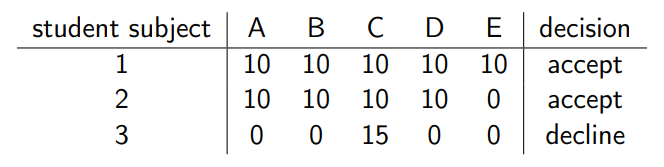

pandas uses NumPy as its backend for data manipulation.

In [22]:
df = mnist.data
df['label'] = mnist.target
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


## Homework

- Type your answers here and submit your answer in `*.ipynb` format.
- You may use code cell and Markdown cell.

In [23]:
NAME = "李瑋宸" # change to your name
STD_ID = "B123245008" # change to your student ID
print("My name is %s and my student ID is %s."%(NAME, STD_ID))

My name is 李瑋宸 and my student ID is B123245008.


### Exercise 1: Selecting Specific Elements
Create a 5x5 matrix with values from 1 to 25. Use fancy indexing to extract the following:
- The elements at positions (0,0), (1,2), (3,4)
- All elements from the second and fourth rows

In [34]:
arr = np.arange(1,26).reshape(5,5)
print(arr)
rows = np.array([0,1,3])
cols = np.array([0,2,4])
print(arr[rows,cols])

row2 = 1
row4 = 3
print(arr[row2])
print(arr[row4])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
[ 1  8 20]
[ 6  7  8  9 10]
[16 17 18 19 20]


### Exercise 2: Reordering Elements
Given an array `[10, 20, 30, 40, 50]`, use fancy indexing to rearrange the elements in reverse order.

In [25]:
arr = np.arange(10,60,10)
print("Array:",arr)
order = np.arange(4,-1,-1)
print("Order:",order)
print("Reversed_Array:",arr[order])

Array: [10 20 30 40 50]
Order: [4 3 2 1 0]
Reversed_Array: [50 40 30 20 10]


### Exercise 3: Extracting Multiple Rows and Columns
Generate a 6x6 matrix of random integers between 1 and 100. Extract the second, fourth, and sixth rows and the first, third, and fifth columns.

In [26]:
arr = np.random.randint(1,101,(6,6))
print("Array:\n",arr,"\n")
rows = np.array([1,3,5])
print(arr[rows],"\n")
cols = np.array([0,2,4])
print(arr[:,cols])

Array:
 [[ 96  62  83  85  20  96]
 [  3  26  37  57  33  28]
 [  7  45  32 100  46  96]
 [ 22  68   9  14  88  95]
 [ 75  59  30   9  14   2]
 [ 59  64  44  11  30  85]] 

[[ 3 26 37 57 33 28]
 [22 68  9 14 88 95]
 [59 64 44 11 30 85]] 

[[96 83 20]
 [ 3 37 33]
 [ 7 32 46]
 [22  9 88]
 [75 30 14]
 [59 44 30]]


### Exercise 4: Basic Sorting
Create a random array of 10 integers between 1 and 100. Sort the array in ascending and descending order.

In [37]:
arr = np.random.randint(1,101,10)
arr1= arr.copy()
print(arr)
print("asc",arr[arr.argsort()])
print("desc",arr[(-arr).argsort()])
print("\n")
arr1.sort()
print("asc",arr1)
print("desc",arr1[::-1])

[ 97  14  99  40  90  79  67 100  78  36]
asc [ 14  36  40  67  78  79  90  97  99 100]
desc [100  99  97  90  79  78  67  40  36  14]


asc [ 14  36  40  67  78  79  90  97  99 100]
desc [100  99  97  90  79  78  67  40  36  14]


### Exercise 5: Sorting Along an Axis
Generate a 4x4 matrix of random integers between 1 and 50. Sort the matrix along:
- Each row
- Each column

In [28]:
arr = np.random.randint(1,51,(4,4))
arr1 = arr.copy()
print(arr)
arr.sort(axis=1)
print(arr)
arr1.sort(axis=0)
print(arr1)

[[43 15 37  2]
 [15 18 15 21]
 [30 45 45 24]
 [13 49 35 20]]
[[ 2 15 37 43]
 [15 15 18 21]
 [24 30 45 45]
 [13 20 35 49]]
[[13 15 15  2]
 [15 18 35 20]
 [30 45 37 21]
 [43 49 45 24]]


### Exercise 6: Indirect Sorting
Given two NumPy arrays:
```python
names = np.array(["Alice", "Bob", "Charlie", "David"])
scores = np.array([85, 92, 78, 95])
```
Sort `names` based on the corresponding values in `scores` in descending order.

In [35]:
names = np.array(["Alice", "Bob", "Charlie", "David"])
scores = np.array([85, 92, 78, 95])
index = (-scores).argsort()
print(names[index])

['David' 'Bob' 'Alice' 'Charlie']


### Exercise 7: Creating a Structured Array
Create a structured array to store information about students with fields: `name` (string), `age` (integer), and `GPA` (float). Insert at least three students and print the array.

In [30]:
dt = np.dtype([("name",(np.str_,12)),("age",np.int32),("GPA",np.float32)])
arr = np.array([("David",19,2.9),("Tony",21,4.20),("Nroy",18,4.31),("Me",35,3.7)],dtype=dt)
print(arr)

[('David', 19, 2.9 ) ('Tony', 21, 4.2 ) ('Nroy', 18, 4.31)
 ('Me', 35, 3.7 )]


### Exercise 8: Accessing Structured Data
Using the structured array from Exercise 7, print:
- All student names
- The ages of students with a GPA greater than 3.5

In [31]:
print(arr["name"])
print(arr["age"][arr["GPA"] > 3.5])

['David' 'Tony' 'Nroy' 'Me']
[21 18 35]


### Exercise 9: Sorting a Structured Array
Sort the structured array of students by GPA in descending order.

In [32]:
arr =  np.sort(arr,order="GPA")
desc = np.arange(arr.size-1,-1,-1)
#print(desc)
print(arr["GPA"][desc])

[4.31 4.2  3.7  2.9 ]


### Exercise 10: Filtering Structured Data
Filter and print students from the structured array who are older than 20 and have a GPA higher than 3.0.

In [33]:
print(arr["name"][(arr["GPA"] > 3.0) & (arr["age"] > 20)])

['Me' 'Tony']
